In [11]:
import psutil

print(f"Memory Used: {psutil.virtual_memory().percent}%")

Memory Used: 4.3%


In [12]:
import torch
import gc  # Import garbage collector module

torch.cuda.empty_cache()
gc.collect()  # Now this will work properly


20

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import shutil
shutil.rmtree("/kaggle/working/yolo")
shutil.rmtree("/kaggle/working/yolo1(sunny-night)")
shutil.rmtree("/kaggle/working/yolo2(rainny-day)")
shutil.rmtree("/kaggle/working/yolo3(rainny-night)")

# **Importing Neccessary libraries**

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import glob
from PIL import Image

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
np.random.seed(42)
tf.keras.utils.set_random_seed(42)

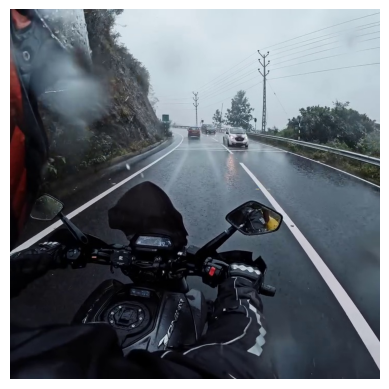

In [17]:
correct_path = "/kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (1).jpg"
img = cv2.imread(correct_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()


(720, 720, 3)

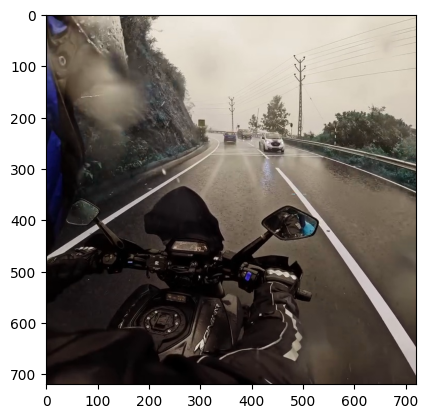

In [18]:
img=cv2.imread(r'/kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (1).jpg')
plt.imshow(img)
plt.show
img.shape

In [19]:
#Get number of files of .jpg format within a folder
import os
from glob import glob

train_Rainny_Day = glob('/kaggle/input/yolo-dataset/images/Train/Rainny/Day/*.jpg')
train_Rainny_Night = glob('/kaggle/input/yolo-dataset/images/Train/Rainny/Night/*.jpg')
train_Sunny_Day = glob('/kaggle/input/yolo-dataset/images/Train/Sunny/Day/*.jpg')
train_Sunny_Night = glob('/kaggle/input/yolo-dataset/images/Train/Sunny/Night/*.jpg')

val_Rainny_Day = glob('/kaggle/input/yolo-dataset/images/Val/Rainny/Day/*.jpg')
val_Rainny_Night = glob('/kaggle/input/yolo-dataset/images/Val/Rainny/Night/*.jpg')
val_Sunny_Day = glob('/kaggle/input/yolo-dataset/images/Val/Sunny/Day/*.jpg')
val_Sunny_Night = glob('/kaggle/input/yolo-dataset/images/Val/Sunny/Night/*.jpg')

# Setting up Dataframes of the images

In [20]:
file_paths = (train_Rainny_Day + train_Rainny_Night + train_Sunny_Day + train_Sunny_Night)

# Create lists of labels
weather = ['Rainny'] * (len(train_Rainny_Day) + len(train_Rainny_Night)) + \
          ['Sunny'] * (len(train_Sunny_Day) + len(train_Sunny_Night))

time_of_day = ['Day'] * (len(train_Rainny_Day) + len(train_Sunny_Day)) + \
              ['Night'] * (len(train_Rainny_Night) + len(train_Sunny_Night))

data = {'filename': file_paths, 'weather': weather, 'period': time_of_day}

# Convert dictionary to DataFrame
train_df = pd.DataFrame(data)
train_df

filename weather period
0     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
1     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
2     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
3     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
4     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
...                                                 ...     ...    ...
2500  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2501  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2502  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2503  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2504  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night

[2505 rows x 3 columns]

In [21]:
file_paths = (val_Rainny_Day + val_Rainny_Night + val_Sunny_Day + val_Sunny_Night)

# Create lists of labels
weather = ['Rainny'] * (len(val_Rainny_Day) + len(val_Rainny_Night)) + \
          ['Sunny'] * (len(val_Sunny_Day) + len(val_Sunny_Night))

time_of_day = ['Day'] * (len(val_Rainny_Day) + len(val_Sunny_Day)) + \
              ['Night'] * (len(val_Rainny_Night) + len(val_Sunny_Night))

data = {'filename': file_paths, 'weather': weather, 'period': time_of_day}

# Convert dictionary to DataFrame
val_df = pd.DataFrame(data)
val_df

filename weather period
0    /kaggle/input/yolo-dataset/images/Val/Rainny/D...  Rainny    Day
1    /kaggle/input/yolo-dataset/images/Val/Rainny/D...  Rainny    Day
2    /kaggle/input/yolo-dataset/images/Val/Rainny/D...  Rainny    Day
3    /kaggle/input/yolo-dataset/images/Val/Rainny/D...  Rainny    Day
4    /kaggle/input/yolo-dataset/images/Val/Rainny/D...  Rainny    Day
..                                                 ...     ...    ...
195  /kaggle/input/yolo-dataset/images/Val/Sunny/Ni...   Sunny  Night
196  /kaggle/input/yolo-dataset/images/Val/Sunny/Ni...   Sunny  Night
197  /kaggle/input/yolo-dataset/images/Val/Sunny/Ni...   Sunny  Night
198  /kaggle/input/yolo-dataset/images/Val/Sunny/Ni...   Sunny  Night
199  /kaggle/input/yolo-dataset/images/Val/Sunny/Ni...   Sunny  Night

[200 rows x 3 columns]

In [22]:
df = train_df

In [23]:
df

filename weather period
0     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
1     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
2     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
3     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
4     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny    Day
...                                                 ...     ...    ...
2500  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2501  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2502  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2503  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night
2504  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny  Night

[2505 rows x 3 columns]

In [24]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [25]:
print(df['period'].value_counts())
print(df['weather'].value_counts())

period
Night    1300
Day      1205
Name: count, dtype: int64
weather
Rainny    1300
Sunny     1205
Name: count, dtype: int64


In [26]:
train_weather=df.drop('period', axis=1)
train_period=df.drop('weather',axis=1)


In [27]:
train_weather

filename weather
0     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny
1     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny
2     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny
3     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny
4     /kaggle/input/yolo-dataset/images/Train/Rainny...  Rainny
...                                                 ...     ...
2500  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny
2501  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny
2502  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny
2503  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny
2504  /kaggle/input/yolo-dataset/images/Train/Sunny/...   Sunny

[2505 rows x 2 columns]

# Image Data Generators for the Resnet Training models

In [28]:
import matplotlib.image as mpimg
import os
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [29]:
import keras_cv
datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=True,
    rotation_range=2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    channel_shift_range=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    # PARAMS TO EXPLORE
    validation_split=0.2,
    zoom_range=0.1,
    preprocessing_function= None
)

In [30]:
mytrain=datagen.flow_from_dataframe(
    train_weather,
    x_col='filename',
    y_col='weather',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="training"
)
myvalid=datagen.flow_from_dataframe(
    train_weather,
    x_col='filename',
    y_col='weather',
    target_size=(224,224),
    color_mode='rgb',
     class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="validation"
)

Found 2004 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


In [31]:
mytrain2=datagen.flow_from_dataframe(
    train_period,
    x_col='filename',
    y_col='period',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="training"
)
myvalid2=datagen.flow_from_dataframe(
    train_period,
    x_col='filename',
    y_col='period',
    target_size=(224,224),
    color_mode='rgb',
     class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="validation"
)

Found 2004 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


# Two Pretrained ResNet Model

In [32]:
base_model=tf.keras.applications.resnet.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,  
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
base_model2=tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,
)


In [34]:
base_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [35]:
base_model2.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [36]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [37]:
print(df['period'].value_counts())
print(df['weather'].value_counts())

period
Night    1300
Day      1205
Name: count, dtype: int64
weather
Rainny    1300
Sunny     1205
Name: count, dtype: int64


In [38]:
base_model.trainable = False#freezing
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = Dense(2,activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [39]:
base_model2.trainable = False#freezing
inputs2 = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x2 = base_model2(inputs2, training=False)
x2 = keras.layers.GlobalAveragePooling2D()(x2)
# A Dense classifier with a single unit (binary classification)
outputs2 = Dense(2,activation='softmax')(x2)
model2 = keras.Model(inputs2, outputs2)

In [40]:
model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [41]:
model2.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [42]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]

# Training of Both the ResNet Models

In [43]:
m1 = model.fit(
    mytrain,
    validation_data=myvalid,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 916ms/step - accuracy: 0.8635 - loss: 0.3342 - val_accuracy: 0.8882 - val_loss: 0.2900
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 594ms/step - accuracy: 0.9922 - loss: 0.0409 - val_accuracy: 0.9780 - val_loss: 0.0949
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 594ms/step - accuracy: 0.9988 - loss: 0.0215 - val_accuracy: 0.9721 - val_loss: 0.0959
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 609ms/step - accuracy: 0.9992 - loss: 0.0152 - val_accuracy: 0.9880 - val_loss: 0.0469
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 604ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.9701 - val_loss: 0.0630
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 600ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9840 - val_loss: 0.0437
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 605ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9880 - val_loss: 0.0400
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 593ms/step - accuracy: 0.9998 - loss: 0.0045 - val_accuracy: 1.000

In [44]:
m2 = model2.fit(
    mytrain2,
    validation_data=myvalid2,
    epochs=10,
    verbose=1
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 712ms/step - accuracy: 0.7291 - loss: 0.6384 - val_accuracy: 0.9461 - val_loss: 0.1941
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 600ms/step - accuracy: 0.9373 - loss: 0.2168 - val_accuracy: 0.9182 - val_loss: 0.2512
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 595ms/step - accuracy: 0.9406 - loss: 0.1830 - val_accuracy: 0.9860 - val_loss: 0.0596
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 590ms/step - accuracy: 0.9522 - loss: 0.1644 - val_accuracy: 0.9701 - val_loss: 0.1242
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 596ms/step - accuracy: 0.9473 - loss: 0.1516 - val_accuracy: 0.9960 - val_loss: 0.0288
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 599ms/step - accuracy: 0.9441 - loss: 0.1524 - val_accuracy: 0.9621 - val_loss: 0.1402
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 591ms/step - accuracy: 0.9508 - loss: 0.1440 - val_accuracy: 0.9361 - val_loss: 0.1940
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 586ms/step - accuracy: 0.9328 - loss: 0.1680 - val_accu

In [45]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [46]:
base_model2.trainable = True
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [47]:
mval = model.fit(
    mytrain,
    validation_data=myvalid,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1,
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9941 - loss: 0.0299 - val_accuracy: 0.9820 - val_loss: 0.0345
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 621ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9920 - val_loss: 0.0241
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 638ms/step - accuracy: 0.9996 - loss: 0.0040 - val_accuracy: 0.9940 - val_loss: 0.0167
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 627ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9920 - val_loss: 0.0282
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 631ms/step - accuracy: 0.9997 - loss: 0.0028 - val_accuracy: 0.9940 - val_loss: 0.0180


In [48]:
mval2 = model2.fit(
    mytrain2,
    validation_data=myvalid2,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 96s 939ms/step - accuracy: 0.9405 - loss: 0.1864 - val_accuracy: 0.9960 - val_loss: 0.0166
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 632ms/step - accuracy: 0.9378 - loss: 0.1847 - val_accuracy: 0.9960 - val_loss: 0.0123
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 632ms/step - accuracy: 0.9529 - loss: 0.1353 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 628ms/step - accuracy: 0.9449 - loss: 0.1452 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 628ms/step - accuracy: 0.9466 - loss: 0.1360 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 635ms/step - accuracy: 0.9577 - loss: 0.1172 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 639ms/step - accuracy: 0.9558 - loss: 0.1178 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 629ms/step - accuracy: 0.9629 - loss: 0.1055 - val_accu

In [49]:
#Predictions
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def make_predictions(image_path):
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds 

In [50]:
#time
def make_predictions2(image_path):
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model2.predict(image)
    return preds

In [51]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [52]:
weather_list[np.argmax(make_predictions("/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (651).jpg"))],period_list[np.argmax(make_predictions2("/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (651).jpg"))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


('Rainny', 'Day')

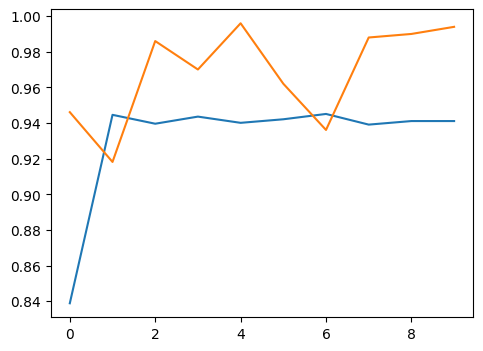

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])


plt.show()

In [54]:
model.save('rainny_sunny.h5')
model2.save('day_night.h5')

In [55]:
pd.set_option('display.max_colwidth', None)

In [56]:
val_df

filename  \
0    /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (679).jpg   
1    /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (680).jpg   
2    /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (696).jpg   
3    /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (656).jpg   
4    /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (688).jpg   
..                                                                    ...   
195     /kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (694).jpg   
196     /kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (653).jpg   
197     /kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (655).jpg   
198     /kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (664).jpg   
199     /kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (662).jpg   

    weather period  
0    Rainny    Day  
1    Rainny    Day  
2    Rainny    Day  
3    Rainny    Day  
4    Rainny    Day  
..      ...    ...  
195   Sunny  Night  
196   Sunny  Night  
197   Sunny  Night  
198   Sunny  Night  
199   Sunny  Night  

[200 rows x 3 columns]

In [57]:
len(val_df)

200

In [58]:
true_time_labels = np.array(val_df[['period']])

In [59]:
true_time_label = []
for i in true_time_labels:
    if i == ['Day']:
        true_time_label.append(0)
    else:
        true_time_label.append(1)

In [60]:
len(true_time_label)

200

In [61]:
true_weather_labels = np.array(val_df[['weather']])
len(true_weather_labels)

200

In [62]:
true_weather_label = []
for i in true_weather_labels:
    if i == ['Rainny']:
        true_weather_label.append(0)
    else:
        true_weather_label.append(1)

In [63]:
len(true_weather_label)

200

In [64]:
filenames = np.array(val_df[['filename']])
filenames.flatten()
#filenames

array(['/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (679).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (680).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (696).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (656).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (688).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (699).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (668).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (671).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (658).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (662).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (693).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny

In [65]:
pred_time_labels = []
for i in filenames:
    pred_time_labels.append(np.argmax(make_predictions2(i[0])))
pred_time_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [66]:
pred_weather_labels = []
for i in filenames:
    pred_weather_labels.append(np.argmax(make_predictions(i[0])))
pred_weather_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

# Classification reports of the Two Resnets after Testing on unseen data

In [67]:
print(classification_report(true_weather_label, pred_weather_labels))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.87      0.77      0.81       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [68]:
print(classification_report(true_time_label, pred_time_labels))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       100
           1       1.00      0.69      0.82       100

    accuracy                           0.84       200
   macro avg       0.88      0.84      0.84       200
weighted avg       0.88      0.84      0.84       200



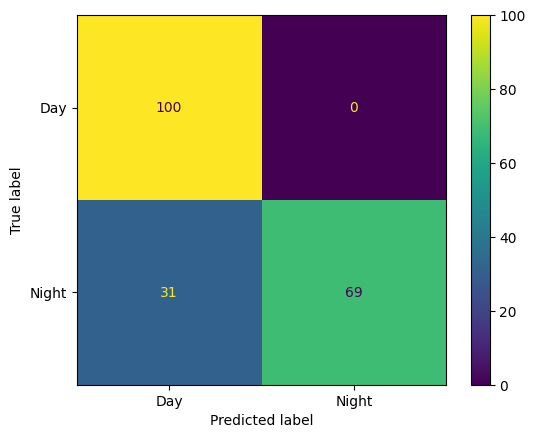

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_time_label, pred_time_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Day', 'Night'])
disp.plot()
plt.show()

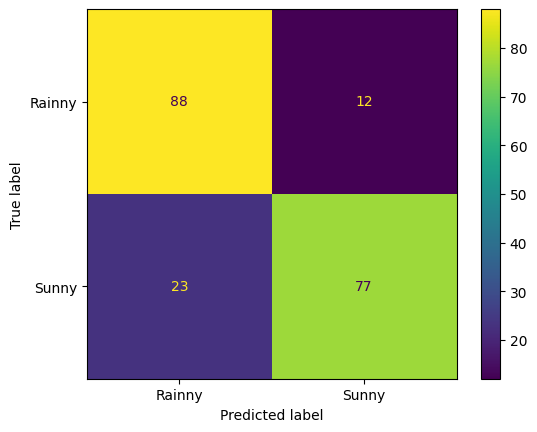

In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_weather_label, pred_weather_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Rainny', 'Sunny'])
disp.plot()
plt.show()

In [74]:
!kaggle datasets init -p /kaggle/working/

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [75]:
!kaggle datasets create -p /kaggle/working/ --dir-mode tar

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [71]:
!pip install numba

In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [73]:
!rm -rf /kaggle/working/runs/*

# YOLO Object Detection Training

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 16.0 MB/s eta 0:00:00a 0:00:01


In [2]:
import torch
torch.cuda.empty_cache()

In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import torch
random_seed = 42
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# YOLO training on Vehicles of Sunny Weather and Daytime 

In [5]:
model_sunny_day = YOLO('yolov8x.pt')
result=model_sunny_day.train(data='/kaggle/input/yolo-dataset/sunny-day.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=False
)

100%|██████████| 131M/131M [00:01<00:00, 73.7MB/s] 


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/sunny-day.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 3.96MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Sunny/Day... 650 images, 1 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:02<00:00, 299.30it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Sunny is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Sunny/Day... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 278.65it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Sunny is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      12.2G      2.117      2.473      1.585        223        640: 100%|██████████| 41/41 [00:50<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         50        535      0.558      0.315      0.345      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.7G      1.998      1.685      1.546        197        640: 100%|██████████| 41/41 [00:53<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         50        535      0.337      0.395      0.314      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.7G      2.017      1.652      1.544        210        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         50        535      0.461      0.185      0.189     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.7G      2.012      1.541      1.512        300        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50        535      0.752      0.212      0.267      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.7G          2      1.496      1.531        179        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50        535      0.359       0.37      0.377      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.7G      1.985      1.496      1.522        259        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50        535      0.584      0.289      0.355      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.7G      1.969      1.414      1.511        287        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50        535      0.522      0.341      0.383      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.7G      1.939      1.347      1.483        267        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         50        535        0.4      0.323      0.307       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.7G      1.919      1.321      1.499        229        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         50        535      0.612      0.355      0.476      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.7G      1.905      1.284      1.482        236        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         50        535      0.647      0.319      0.454      0.203


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.7G      1.835      1.168      1.438        102        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50        535      0.551      0.337      0.424      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.7G      1.829      1.097      1.433        122        640: 100%|██████████| 41/41 [00:53<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         50        535       0.63      0.439      0.519      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.7G       1.79      1.066      1.404         86        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50        535      0.562      0.474       0.52      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.7G      1.794      1.049      1.413         89        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50        535      0.515      0.476      0.496      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.7G      1.768       1.02      1.397         89        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50        535      0.533      0.527      0.538      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.7G      1.747     0.9889      1.377        130        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50        535      0.627      0.421      0.489       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.7G      1.736     0.9426      1.383         77        640: 100%|██████████| 41/41 [00:53<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         50        535      0.709       0.48      0.544      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.7G      1.696       0.91      1.351        103        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50        535      0.649      0.516      0.607      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.7G      1.691     0.8907      1.352        101        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50        535      0.785       0.49      0.596      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.7G      1.679     0.8805      1.347        118        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50        535      0.796      0.494      0.597      0.279



20 epochs completed in 0.320 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,136,087 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


                   all         50        535       0.71      0.467      0.575      0.275
                   car         43        424      0.632      0.749      0.749      0.364
                  bike          4          5       0.79        0.6      0.822      0.412
                   bus         18         22      0.558      0.545      0.517      0.227
             minitruck         30         34       0.59      0.529      0.563      0.274
                 truck          7         22      0.689      0.304      0.495      0.206
                   van         25         28          1     0.0728      0.305      0.168


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 51.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


In [6]:
import shutil

source_path = "/kaggle/working/runs/detect/train"

destination_path = "/kaggle/working/yolo(sunny-day)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(sunny-day)'

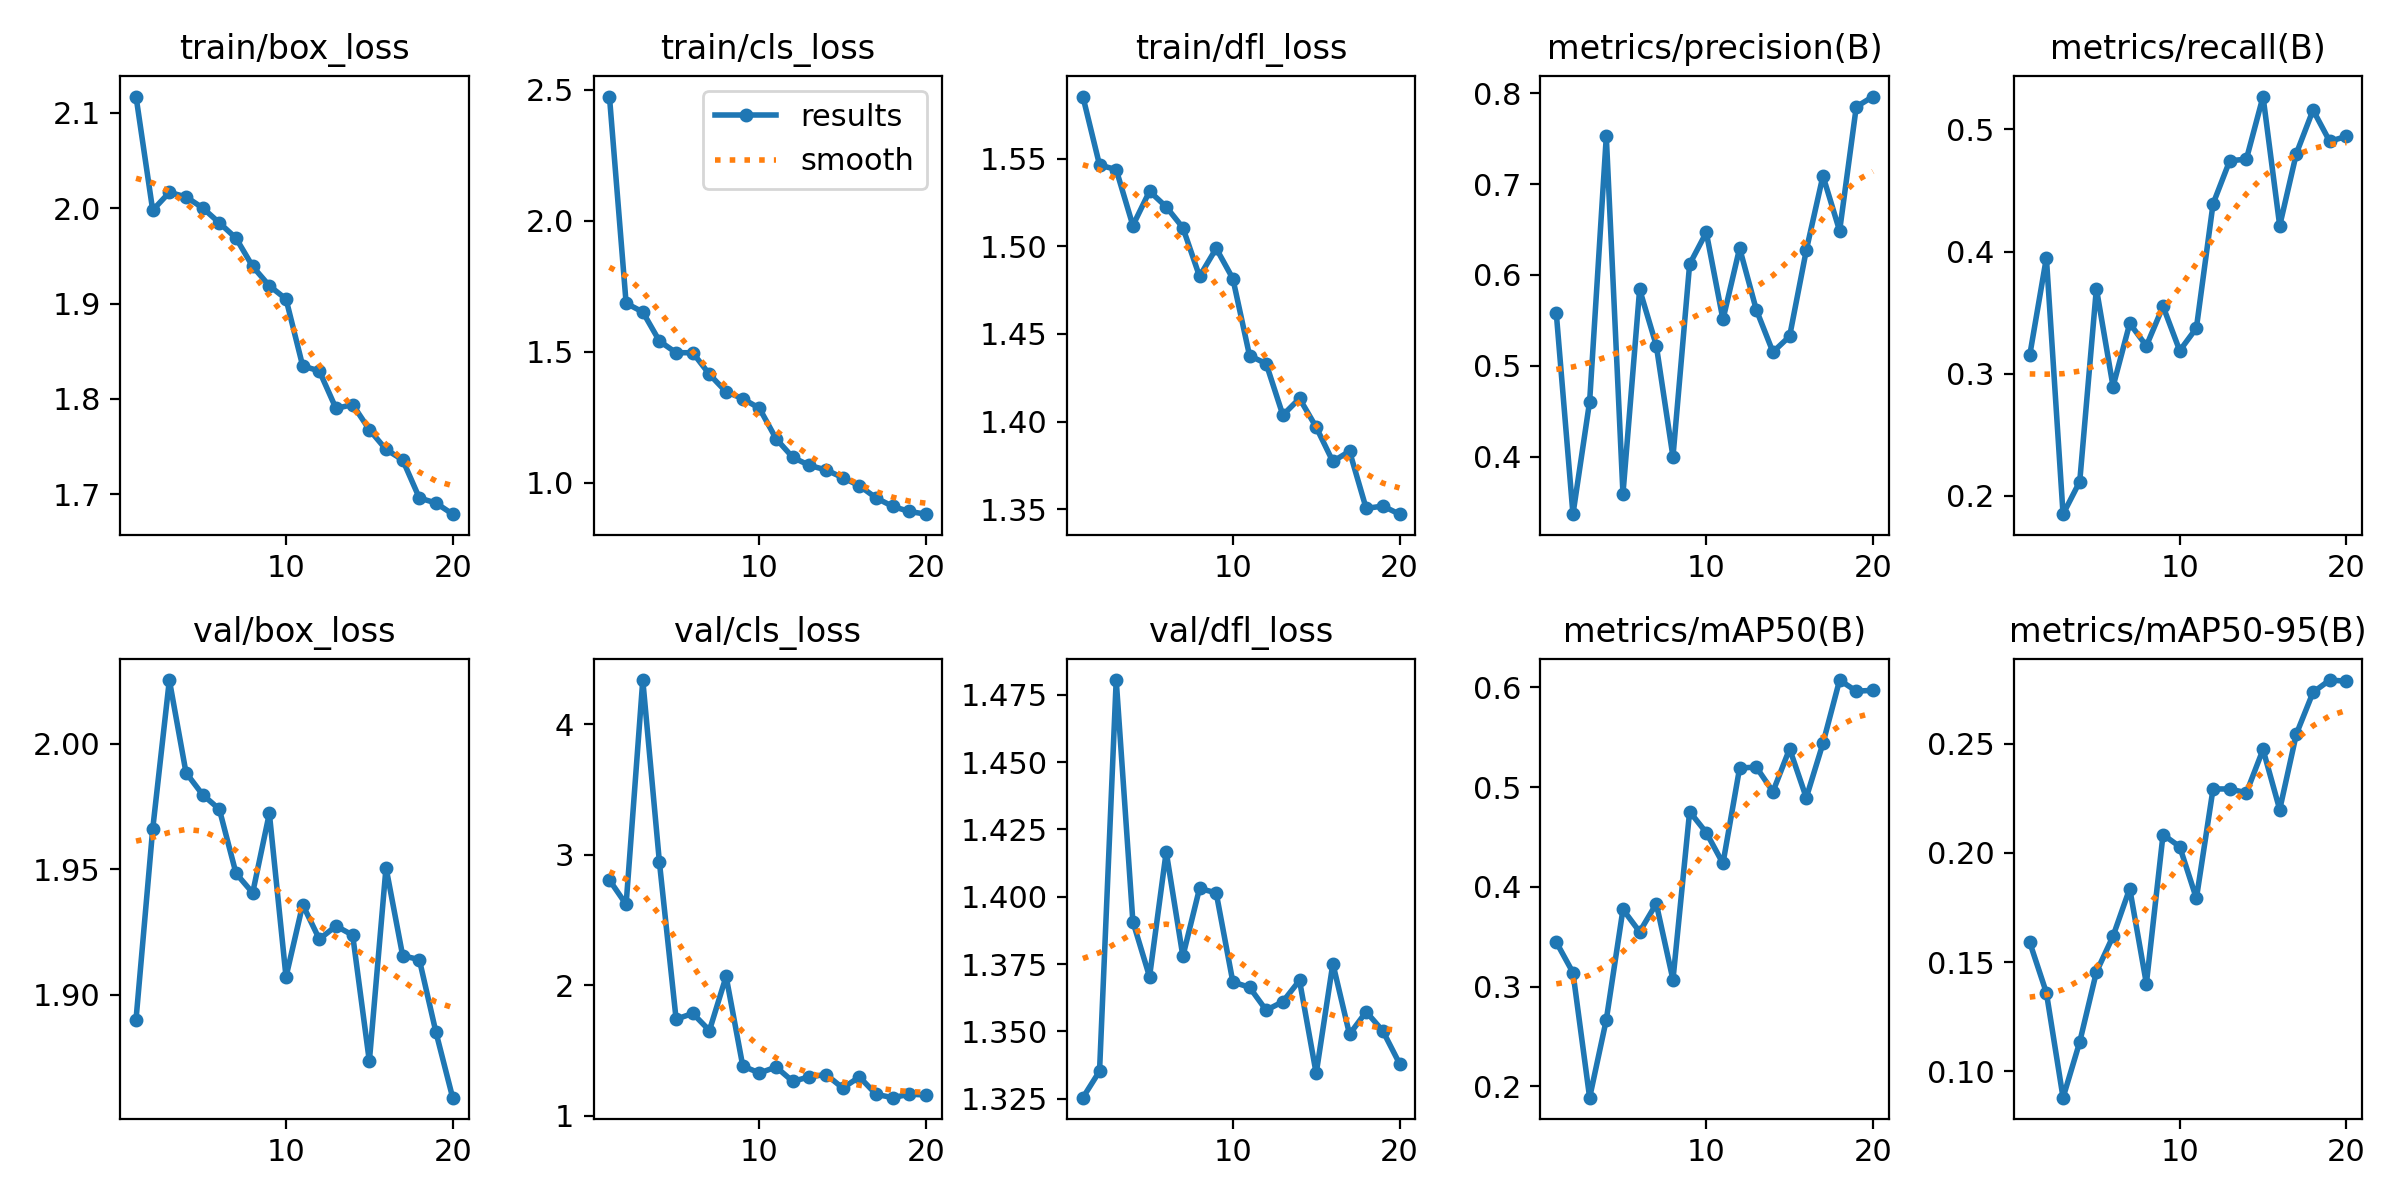

In [8]:
from PIL import Image
Image.open("/kaggle/working/yolo(sunny-day)/results.png")

In [9]:
import pandas as pd
pd.read_csv("/kaggle/working/yolo(sunny-day)/results.csv")

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1    58.696         2.11707         2.47325         1.58533   
1       2   114.973         1.99787         1.68501         1.54633   
2       3   172.743         2.01658         1.65160         1.54368   
3       4   230.492         2.01188         1.54059         1.51180   
4       5   287.828         2.00025         1.49628         1.53137   
5       6   345.397         1.98461         1.49626         1.52247   
6       7   403.746         1.96860         1.41391         1.51059   
7       8   462.020         1.93891         1.34711         1.48284   
8       9   519.343         1.91862         1.32110         1.49880   
9      10   577.572         1.90476         1.28428         1.48154   
10     11   635.209         1.83461         1.16805         1.43769   
11     12   691.922         1.82926         1.09729         1.43307   
12     13   749.529         1.78996         1.06642         1.40377   
13     14   807.210         1.79411         1.04925         1.41327   
14     15   864.071         1.76777         1.01977         1.39688   
15     16   921.753         1.74701         0.98889         1.37734   
16     17   978.428         1.73607         0.94263         1.38320   
17     18  1036.060         1.69615         0.91004         1.35058   
18     19  1093.730         1.69081         0.89073         1.35195   
19     20  1151.330         1.67914         0.88053         1.34731   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.55772            0.31506           0.34467   
1                0.33679            0.39491           0.31410   
2                0.46073            0.18496           0.18872   
3                0.75243            0.21161           0.26680   
4                0.35930            0.36975           0.37743   
5                0.58413            0.28948           0.35499   
6                0.52238            0.34118           0.38323   
7                0.39988            0.32279           0.30695   
8                0.61178            0.35519           0.47553   
9                0.64678            0.31887           0.45447   
10               0.55101            0.33736           0.42358   
11               0.62950            0.43906           0.51923   
12               0.56174            0.47440           0.52014   
13               0.51518            0.47567           0.49558   
14               0.53253            0.52698           0.53849   
15               0.62712            0.42120           0.48945   
16               0.70903            0.48033           0.54394   
17               0.64855            0.51591           0.60742   
18               0.78498            0.49031           0.59629   
19               0.79630            0.49435           0.59711   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0               0.15908       1.89008       2.80663       1.32537  0.000191   
1               0.13594       1.96596       2.61998       1.33521  0.000368   
2               0.08788       2.02543       4.33907       1.48043  0.000525   
3               0.11340       1.98848       2.94109       1.39077  0.000501   
4               0.14541       1.97971       1.74033       1.37027  0.000472   
5               0.16188       1.97391       1.78486       1.41668  0.000442   
6               0.18368       1.94836       1.65343       1.37788  0.000413   
7               0.14011       1.94058       2.06843       1.40308  0.000384   
8               0.20840       1.97229       1.38180       1.40140  0.000355   
9               0.20286       1.90707       1.32785       1.36830  0.000326   
10              0.17916       1.93589       1.37411       1.36636  0.000297   
11              0.22931       1.92212       1.26379       1.35783  0.000268   
12              0.22929       1.92738       1.29911       1.36102  0.000239   
13              0.22755       1.92372   

In [5]:
import cv2
import matplotlib.pyplot as plt

# Define a function to draw boxes
def draw_boxes(image, results):
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > 0.6:
            
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(image, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)


In [6]:
# Load the image
def make_boxes(model, image_path):
    results = model(image_path)[0]
    image = cv2.imread(image_path)
    draw_boxes(image, results)

    # Convert the image from BGR to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [7]:
make_boxes(model_sunny_day, "/kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (124).jpg")

NameError: name 'model_sunny_day' is not defined

# YOLO training on Sunny Night Conditions

In [3]:
from ultralytics import YOLO

model_sunny_night = YOLO('yolov8x.pt')
result=model_sunny_night.train(data='/kaggle/input/yolo-dataset/sunny-night.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:00<00:00, 215MB/s] 


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/sunny-night.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Sunny/Night... 650 images, 1 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:03<00:00, 205.70it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Sunny is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.4GB RAM): 100%|██████████| 650/650 [00:01<00:00, 350.52it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Sunny/Night... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 181.95it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Sunny is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 50/50 [00:00<00:00, 140.45it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      12.3G      1.989      2.893      1.732         94        640: 100%|██████████| 41/41 [00:50<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all         50        259      0.535      0.293      0.294      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.3G      1.887      1.961      1.706        109        640: 100%|██████████| 41/41 [00:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         50        259       0.52      0.204      0.229     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.2G      1.922      1.865      1.719        107        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         50        259      0.159      0.335      0.193     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.2G      1.865      1.709      1.686        125        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         50        259      0.505      0.278      0.251      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.6G      1.861      1.624      1.704         95        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         50        259      0.325      0.208      0.158     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.5G      1.829      1.522      1.668        110        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         50        259      0.553      0.195      0.224     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.5G      1.751      1.426      1.626        105        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50        259      0.493      0.237      0.267      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.2G      1.763      1.362      1.602        105        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50        259      0.436      0.277      0.267      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.7G      1.718      1.275      1.576        100        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50        259      0.485       0.36      0.348      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.5G      1.687      1.237      1.581         84        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         50        259      0.417       0.26      0.276      0.102


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.5G       1.69      1.155      1.564         43        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         50        259      0.352      0.367      0.356      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.3G       1.67      1.067      1.553         45        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         50        259      0.489      0.377        0.4      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.6G      1.634      1.022      1.506         65        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50        259      0.529      0.267      0.332      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.5G      1.602     0.9801      1.501         51        640: 100%|██████████| 41/41 [00:53<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50        259      0.552      0.251      0.331       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.5G      1.577     0.9568      1.471         36        640: 100%|██████████| 41/41 [00:53<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50        259       0.49      0.364      0.382      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.3G      1.542     0.9038      1.449         35        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         50        259      0.518      0.335      0.385      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.6G      1.552     0.8694      1.448         54        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50        259      0.393      0.372      0.372      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.5G      1.517     0.8144      1.439         47        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         50        259      0.574      0.368      0.419      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.5G      1.496      0.804      1.424         44        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         50        259      0.413      0.402      0.423        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.3G      1.459     0.7707      1.396         45        640: 100%|██████████| 41/41 [00:54<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         50        259      0.445      0.429      0.431      0.203



20 epochs completed in 0.322 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,138,013 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


                   all         50        259      0.586      0.371      0.439      0.207
                   car         16         21      0.575      0.524      0.456      0.203
                  bike         45         70      0.412      0.629      0.525      0.224
                  auto         20         33      0.518       0.65      0.687      0.341
                 cycle         29         46      0.482       0.13      0.142      0.075
             minitruck         24         24          1          0          0          0
                 truck         25         25      0.641        0.6      0.688      0.271
                  taxi         10         10      0.851        0.4      0.837      0.472
                  toto         28         30      0.212     0.0333      0.177     0.0728


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 57.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


In [5]:
import shutil

source_path = "/kaggle/working/runs/detect/train"

destination_path = "/kaggle/working/yolo(sunny-night)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(sunny-night)'

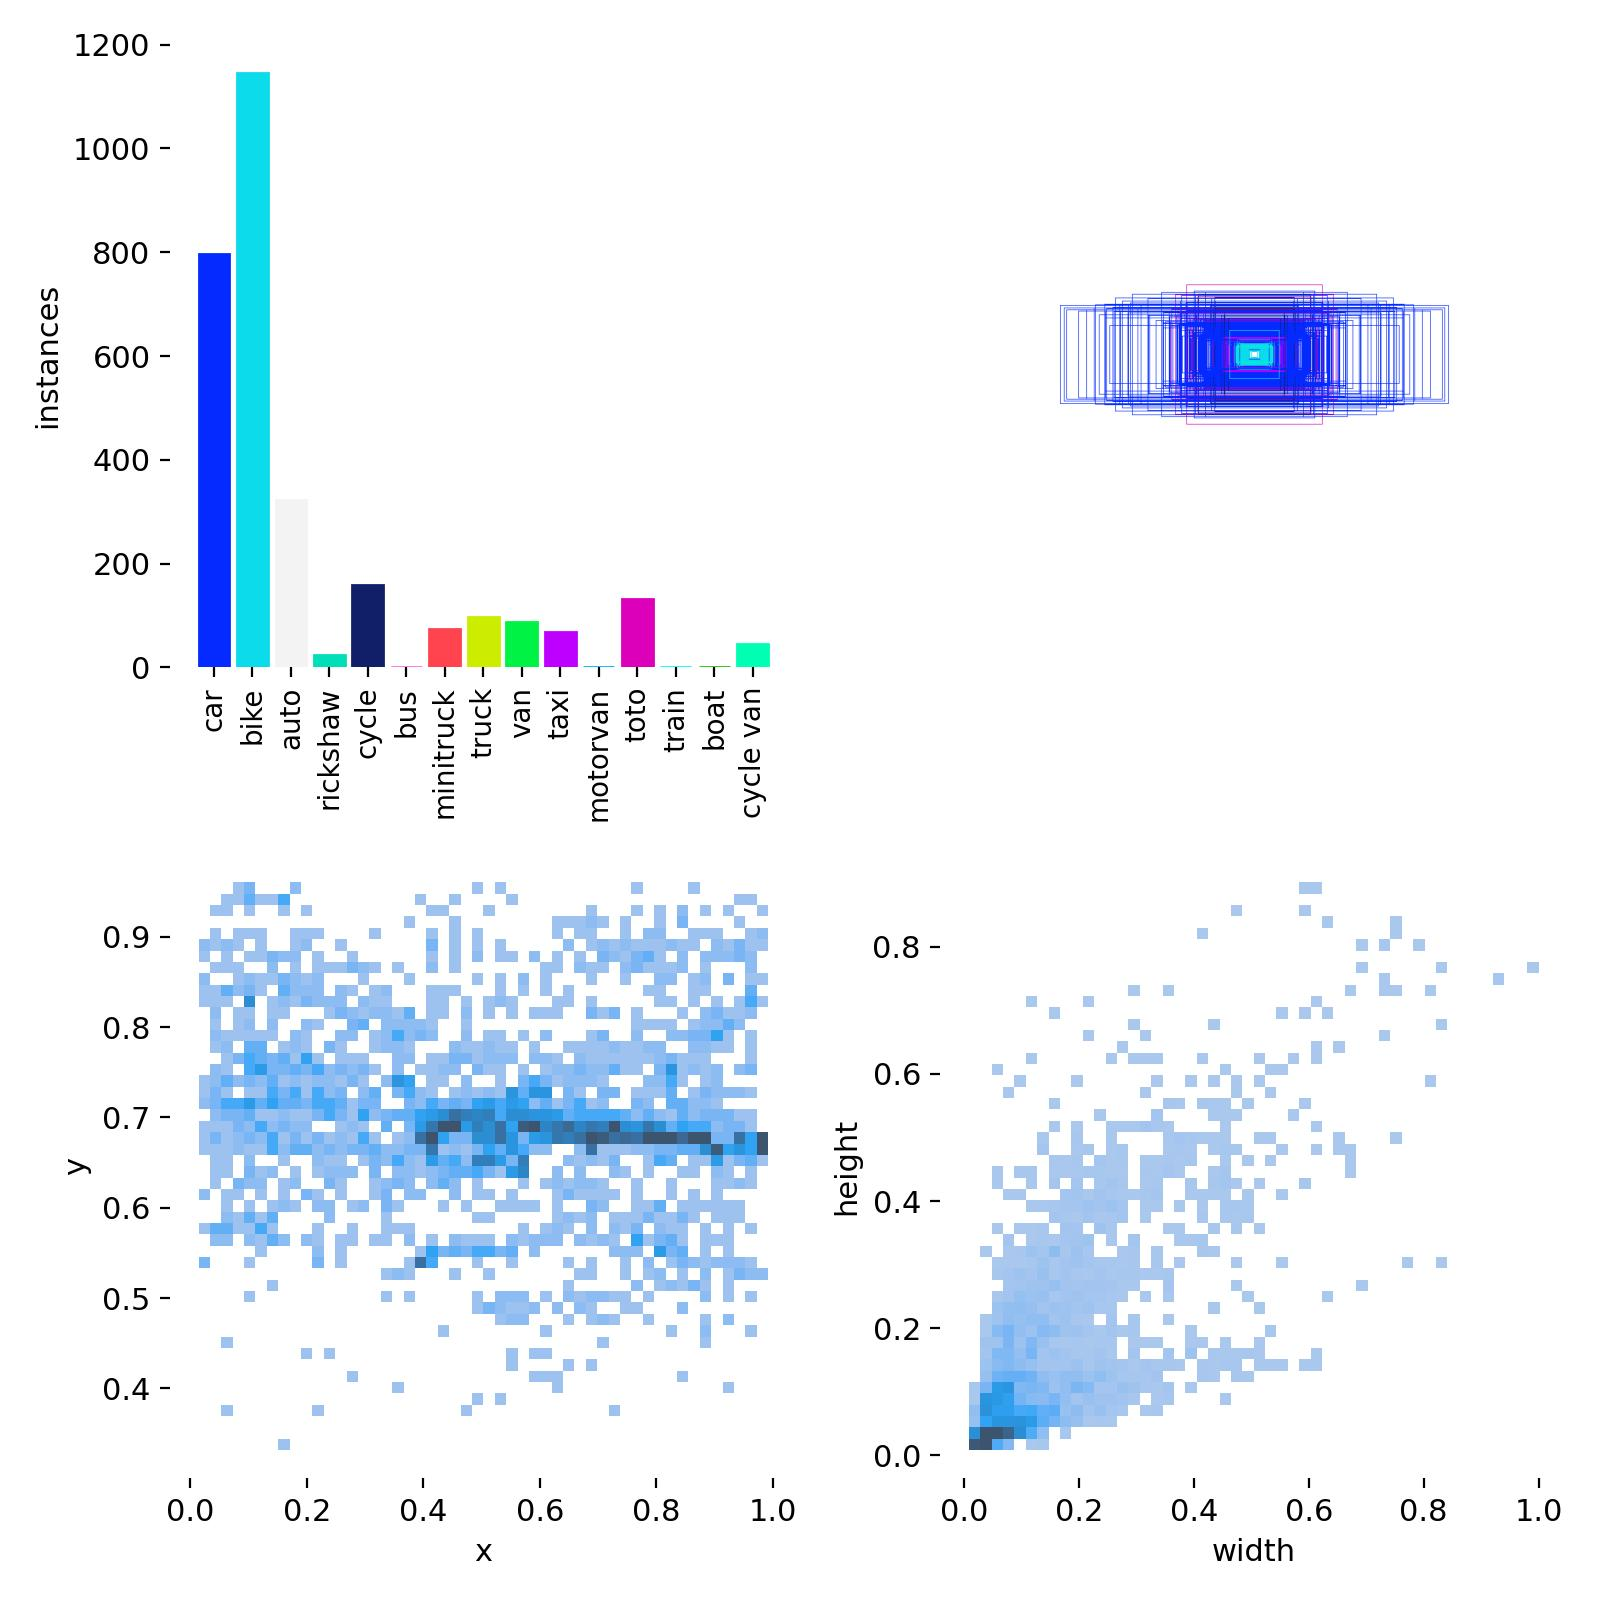

In [10]:
Image.open("/kaggle/working/yolo(sunny-night)/labels.jpg")

In [11]:
model_sunny_night = YOLO("/kaggle/working/yolo(sunny-night)/weights/best.pt")


image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (200).jpg: 640x384 3 cars, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


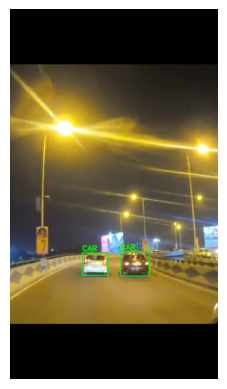

In [16]:
make_boxes(model_sunny_night, "/kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (200).jpg")

# YOLO Training on Rainny Day Conditions

In [7]:
from ultralytics import YOLO

model_rainny_day = YOLO('yolov8x.pt')
result=model_rainny_day.train(data='/kaggle/input/yolo-dataset/rainny-day.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:00<00:00, 211MB/s]  


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/rainny-day.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 16.9MB/s]


Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Rainny/Day... 650 images, 0 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:02<00:00, 265.80it/s]

train: WARNING ⚠️ /kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (236).jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Rainny is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.6GB RAM): 100%|██████████| 650/650 [00:02<00:00, 220.04it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Day... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 258.83it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 50/50 [00:00<00:00, 143.90it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      12.2G      2.062      2.724       1.61        132        640: 100%|██████████| 41/41 [00:51<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all         50        168      0.838       0.58      0.727      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.3G      1.901       1.61      1.531        161        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         50        168      0.491      0.648      0.617      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.2G      1.912      1.481      1.558        193        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.498        0.7      0.502      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.3G      1.874      1.351      1.512        248        640: 100%|██████████| 41/41 [01:00<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         50        168      0.509      0.709      0.625      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.6G      1.872      1.291      1.514        175        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.526      0.605      0.639      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.4G      1.867      1.236      1.497        245        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         50        168      0.865      0.588      0.713      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.4G      1.827      1.145      1.477         90        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         50        168      0.857      0.582      0.724       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.2G      1.801      1.113      1.454        198        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         50        168       0.93        0.6      0.777      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.5G      1.773      1.056      1.456        134        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.852      0.725      0.784      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.4G      1.769      1.019      1.439         44        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         50        168      0.738      0.762       0.81      0.401


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.5G      1.692     0.8984      1.486         28        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.899      0.746      0.803      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.3G      1.682     0.8835      1.493         53        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.872      0.729      0.774      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.6G      1.689     0.8259      1.476         33        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168       0.95       0.76      0.842      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.5G      1.653     0.8025      1.475         62        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.896      0.758      0.847      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.5G      1.621     0.7522      1.418         48        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         50        168      0.886      0.698      0.774      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.3G      1.615     0.7349      1.419         68        640: 100%|██████████| 41/41 [00:59<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.908      0.775      0.838      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.6G      1.616     0.7239      1.431         55        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         50        168      0.832      0.736       0.78      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.5G      1.572      0.683      1.389         59        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.848      0.763      0.776      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.5G      1.546     0.6564      1.388         60        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         50        168      0.867      0.787      0.823      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.3G       1.53     0.6461      1.375         27        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50        168      0.848      0.763      0.787      0.416



20 epochs completed in 0.357 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,137,050 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]


                   all         50        168      0.926      0.761      0.814      0.446
                   car         50         91      0.835      0.978      0.883      0.461
                  bike         50         50      0.944          1      0.994      0.668
                  auto         27         27          1      0.306      0.566      0.208


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 76.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


In [8]:
import shutil

source_path = "/kaggle/working/runs/detect/train"

destination_path = "/kaggle/working/yolo(rainny-day)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(rainny-day)'

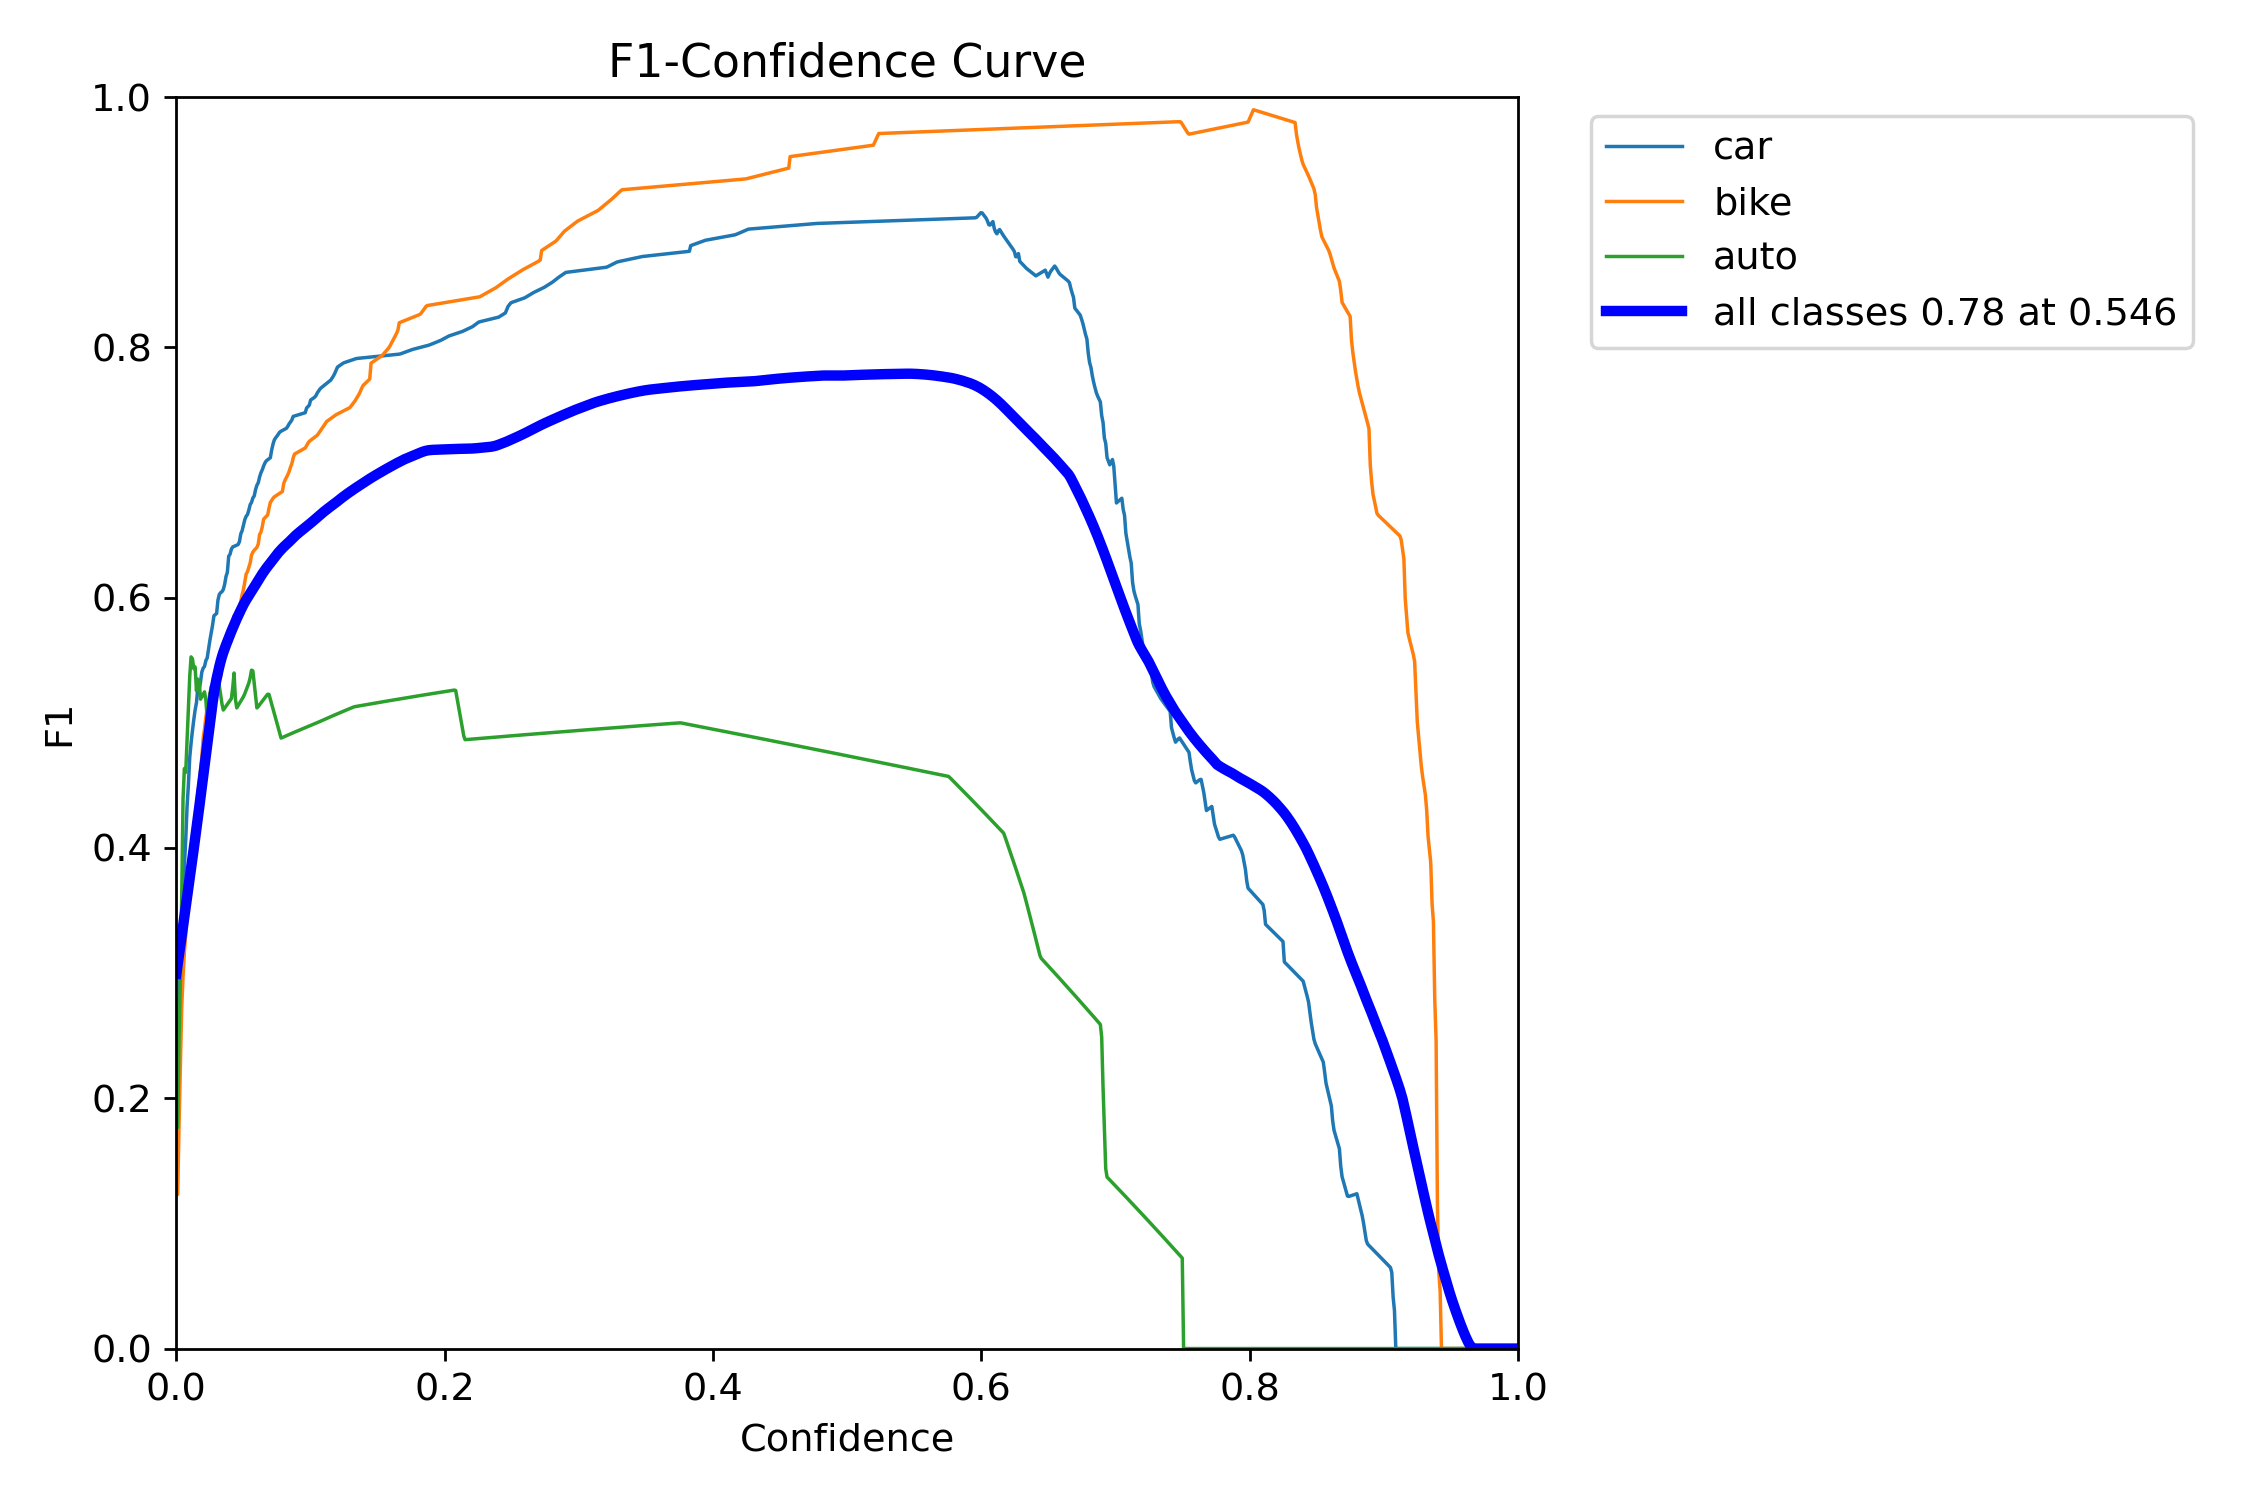

In [10]:
from PIL import Image
Image.open("/kaggle/working/yolo(rainny-day)/F1_curve.png")

In [11]:
model_rainny_day = YOLO("/kaggle/working/yolo(rainny-day)/weights/best.pt")


image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg: 640x640 2 cars, 2 bikes, 1 auto, 96.4ms
Speed: 2.8ms preprocess, 96.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


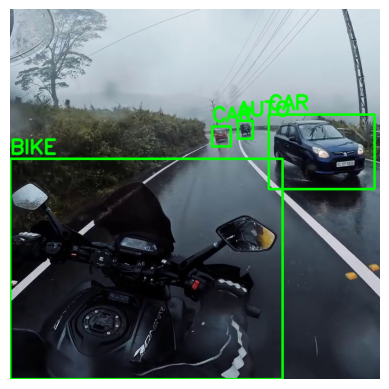

In [12]:
make_boxes(model_rainny_day,"/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg")

# YOLO Training on Rainny Night Conditions

In [9]:
from ultralytics import YOLO

model_rainny_night = YOLO('yolov8x.pt')
result=model_rainny_night.train(data='/kaggle/input/yolo-dataset/rainny-night.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

100%|██████████| 131M/131M [00:03<00:00, 37.8MB/s] 


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolo-dataset/rainny-night.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 3.94MB/s]


Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Rainny/Night... 650 images, 0 backgrounds, 0 corrupt: 100%|██████████| 650/650 [00:04<00:00, 135.85it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Rainny is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.4GB RAM): 100%|██████████| 650/650 [00:02<00:00, 218.52it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Night... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 141.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 50/50 [00:00<00:00, 155.20it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      12.3G      2.032      2.411      1.593        162        640: 100%|██████████| 41/41 [00:53<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         50        237      0.518      0.683      0.582      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.8G       1.87      1.421      1.513        141        640: 100%|██████████| 41/41 [01:01<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50        237      0.815      0.806        0.8      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.8G      1.889      1.393      1.546        126        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         50        237      0.856      0.821      0.846      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.8G      1.825      1.224      1.497        154        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         50        237      0.776      0.847      0.877      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.8G      1.829      1.197      1.514        132        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         50        237      0.907      0.837      0.881      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.8G      1.811      1.167      1.494        138        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         50        237       0.94      0.906      0.939      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.8G      1.772      1.098       1.48        156        640: 100%|██████████| 41/41 [01:00<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         50        237      0.944       0.88      0.931      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.8G      1.743      1.061      1.467        143        640: 100%|██████████| 41/41 [01:00<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         50        237      0.919      0.906      0.946       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.8G      1.715     0.9957      1.436        133        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         50        237      0.948      0.882      0.941      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.8G      1.697     0.9567      1.421        115        640: 100%|██████████| 41/41 [00:59<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         50        237      0.887      0.866      0.907      0.448


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.8G      1.717     0.9109      1.508         40        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         50        237      0.933      0.863      0.915      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.8G      1.703     0.8739      1.504         60        640: 100%|██████████| 41/41 [00:59<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         50        237      0.957      0.892      0.953      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.8G      1.684     0.8389      1.465         50        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         50        237      0.979      0.916      0.957      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.8G      1.656     0.8031       1.46         48        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         50        237      0.947      0.893       0.93      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.8G      1.638     0.7736      1.434         68        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         50        237      0.937      0.916      0.935      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.8G      1.594     0.7465      1.423         57        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         50        237       0.94      0.904      0.941        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.8G      1.597     0.7318      1.427         61        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         50        237      0.905      0.894      0.932      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.8G      1.566      0.706      1.406         47        640: 100%|██████████| 41/41 [00:59<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         50        237      0.907      0.892      0.937      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.8G       1.54     0.6803      1.393         59        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         50        237      0.954      0.887      0.935      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.8G      1.518     0.6628      1.372         34        640: 100%|██████████| 41/41 [00:59<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         50        237      0.959      0.886      0.929      0.494



20 epochs completed in 0.350 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,137,050 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


                   all         50        237      0.946      0.887      0.935      0.477
                   car         50        207      0.951      0.841       0.95      0.508
                   bus         30         30      0.942      0.933      0.919      0.446


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 43.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


In [10]:
import shutil

source_path = "/kaggle/working/runs/detect/train"

destination_path = "/kaggle/working/yolo(rainny-night)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo(rainny-night)'

In [21]:
!pip install ultralytics

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import glob
from PIL import Image

In [8]:
from ultralytics import YOLO

# Detection of Vehicles on Various Weather Conditions

Ensembling Technique was used to get accurate results from the 4 Yolo models

In [9]:
import gc
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import cv2
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
from collections import defaultdict

class ImageClassifierDetector:
    def __init__(self, yolo_models, img_path, threshold):
        self.yolo_models = yolo_models
        self.img_path = img_path
        self.threshold = threshold
        self.dn=0
        self.rs=0
    
    def make_predictions(self, model):
        image = image_utils.load_img(self.img_path, target_size=(224, 224))
        image = image_utils.img_to_array(image)
        image = image.reshape(1,224,224,3)
        image = preprocess_input(image)
        preds = model.predict(image)
        return preds 
    def contains_text(self, image, x1, y1):
        # Define the area where the text would be drawn
        text_width, text_height = 100, 30  # Assumed size of the text area
        y_start = max(0, int(y1) - text_height)
        y_end = int(y1)
        x_start = int(x1)
        x_end = int(x1) + text_width
        
        # Extract the region of interest (ROI)
        roi = image[y_start:y_end, x_start:x_end]

        # Define the green color range
        lower_green = np.array([0, 255, 0])
        upper_green = np.array([0, 255, 0])

        # Create a mask for green color
        mask = cv2.inRange(roi, lower_green, upper_green)
        
        # Check if there are any green pixels in the ROI
        green_pixels = cv2.countNonZero(mask)

        # Heuristic: if there are green pixels, assume the region contains text
        if green_pixels > 0:
            return True
        return False
    
    def draw_boxes(self, image, mp):
        for class_name, values in mp.items():      
            print(class_name, values)
            for value in values:
                x1, y1, x2, y2, score = value
                if score >= self.threshold:
                    if not self.contains_text(image,x1,y1-10):
                        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                        cv2.putText(image, class_name.upper(), (int(x1), int(y1 - 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
    
    def make_boxes(self, models):
        image = cv2.imread(self.img_path)
        mp = defaultdict(list)
        for model in models:
            results = model(self.img_path)[0]
            z = []
            for result in results.boxes.data.tolist():
                x1, y1, x2, y2, score, class_id = result
                class_name = results.names[int(class_id)].lower()
                if(len(mp[class_name]) != 0):
                    v = mp[class_name]
                    if abs(v[-1][0] - x1) >= 6 and abs(v[-1][1] - y1) >= 6 and abs(v[-1][2] - x2) >= 6 and abs(v[-1][3]- y2)>=6:
                        mp[class_name].append([x1,y1,x2,y2,score])
                else:
                    mp[class_name].append([x1,y1,x2,y2,score])      
        self.draw_boxes(image, mp)
        # Convert the image from BGR to RGB for displaying
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()
    def run_tf(self):
        model_day_night = tf.keras.models.load_model("/kaggle/input/vdclassification/day_night.h5")
        model_rainny_sunny = tf.keras.models.load_model("/kaggle/input/vdclassification/rainny_sunny.h5")
        dn = np.argmax(self.make_predictions(model_day_night))
        rs = np.argmax(self.make_predictions(model_rainny_sunny))
        f = open("dn_rs.txt", "w")
        f.write(f"{dn},{rs}")
        f.close()
        print(dn , rs)
    def run(self):
        p = multiprocessing.Process(target=self.run_tf)
        p.start()
        p.join()
        f=open("dn_rs.txt", "r")
        self.dn, self.rs = map(int, f.read().split(","))
        print(self.dn + self.rs)
        f.close()
        self.make_boxes([self.yolo_models[self.dn+self.rs], self.yolo_models[self.rs + (self.dn==0)]])

In [25]:
from ultralytics import YOLO

In [10]:
model_sunny_day = YOLO("/kaggle/input/vddataset/sunny_day_best .pt")
model_sunny_night = YOLO("/kaggle/input/newsunnynight/sunny_night_new.pt")
model_rainny_day = YOLO("/kaggle/input/vddataset/rainny_day_best.pt")
model_rainny_night = YOLO("/kaggle/input/vddataset/rainny_night_best .pt")

In [11]:
models = [model_rainny_day, model_rainny_night, model_sunny_day, model_sunny_night]

In [12]:
test = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg", threshold=0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
0 0
0

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 1 car, 117.0ms
Speed: 21.4ms preprocess, 117.0ms inference, 433.2ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 4 cars, 1 bus, 58.0ms
Speed: 2.1ms preprocess, 58.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
car [[692.3944702148438, 809.5186767578125, 1076.59326171875, 1031.2816162109375, 0.822024405002594], [0.0, 822.771240234375, 338.6404724121094, 1044.0208740234375, 0.8040342926979065], [374.5826110839844, 812.9384765625, 444.6456298828125, 888.4398193359375, 0.5722041726112366]]
bus [[75.98127746582031, 738.4378051757812, 249.29351806640625, 845.964111328125, 0.6209731698036194]]


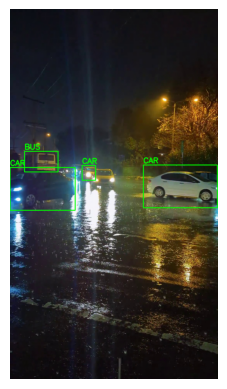

In [13]:
test.run()

In [16]:
test1 = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg", threshold = 0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0 0
0

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 1 car, 63.1ms
Speed: 3.5ms preprocess, 63.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 4 cars, 1 bus, 62.8ms
Speed: 2.0ms preprocess, 62.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
car [[692.3944702148438, 809.5186767578125, 1076.59326171875, 1031.2816162109375, 0.822024405002594], [0.0, 822.771240234375, 338.6404724121094, 1044.0208740234375, 0.8040342926979065], [374.5826110839844, 812.9384765625, 444.6456298828125, 888.4398193359375, 0.5722041726112366]]
bus [[75.98127746582031, 738.4378051757812, 249.29351806640625, 845.964111328125, 0.6209731698036194]]


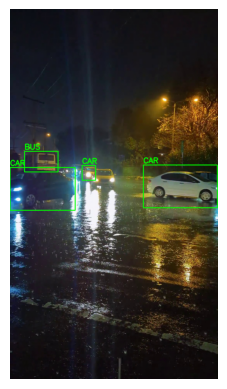

In [17]:
test1.run()

In [15]:
test2 = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (105).jpg", threshold = 0.1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1 1
2

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (105).jpg: 384x640 12 cars, 1 taxi, 56.7ms
Speed: 1.4ms preprocess, 56.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (105).jpg: 384x640 5 cars, 40.4ms
Speed: 1.2ms preprocess, 40.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
car [[98.35517120361328, 88.46678161621094, 176.01873779296875, 148.7445831298828, 0.7844105958938599], [352.2965087890625, 62.61474609375, 389.467041015625, 95.60079956054688, 0.754044771194458], [167.54074096679688, 84.42919921875, 211.45181274414062, 136.2386932373047, 0.7353358864784241], [200.77049255371094, 72.204345703125, 241.4789276123047, 103.34375, 0.6341632604598999], [133.43161010742188, 54.03308868408203, 191.19003295898438, 90.44539642333984, 0.5972583293914795], [226.15859985351562, 61.69

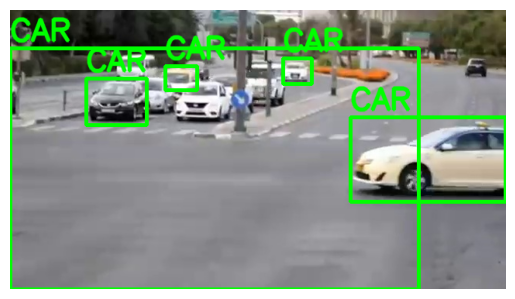

In [16]:
test2.run()

In [17]:
test3 = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (102).jpg", threshold=0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1 1
2

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (102).jpg: 640x384 1 car, 1 bike, 64.1ms
Speed: 3.3ms preprocess, 64.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (102).jpg: 640x384 1 car, 63.6ms
Speed: 1.7ms preprocess, 63.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
bike [[468.6597900390625, 747.068603515625, 543.46484375, 856.5225830078125, 0.5280105471611023]]
car [[560.1541137695312, 728.6795654296875, 637.4776000976562, 805.0235595703125, 0.47040778398513794]]


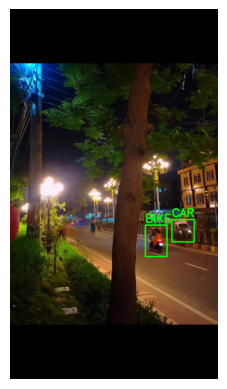

In [18]:
test3.run()

*****SCORES*****

In [17]:
from ultralytics import YOLO

# Load the trained YOLO models
model_sunny_day = YOLO("/kaggle/input/vddataset/sunny_day_best .pt")
model_sunny_night = YOLO("/kaggle/input/vddataset/sunny_night_best.pt")
model_rainny_day = YOLO("/kaggle/input/vddataset/rainny_day_best.pt")
model_rainny_night = YOLO("/kaggle/input/vddataset/rainny_night_best .pt")

# Model name, model object, and respective dataset YAML path
models_info = [
    ("Sunny Day", model_sunny_day, "/kaggle/input/yolo-dataset/sunny-day.yaml"),
    ("Sunny Night", model_sunny_night, "/kaggle/input/yolo-dataset/sunny-night.yaml"),
    ("Rainy Day", model_rainny_day, "/kaggle/input/yolo-dataset/rainny-day.yaml"),
    ("Rainy Night", model_rainny_night, "/kaggle/input/yolo-dataset/rainny-night.yaml")
]

# Evaluate each model and print metrics
for model_name, model, yaml_path in models_info:
    print(f"\n🔍 Evaluating {model_name} Model...")
    eval_results = model.val(data=yaml_path, verbose=True)

    # Access metrics
    precision = eval_results.box.mp
    recall = eval_results.box.mr
    mAP_50 = eval_results.box.map50
    mAP_50_95 = eval_results.box.map

    # Compute F1 Score
    if precision is not None and recall is not None and (precision + recall) > 0:
        f1_score = 2 * precision * recall / (precision + recall)
    else:
        f1_score = None

    # Print the results
    print("📊 Evaluation Metrics:")
    print("mAP@0.5:      ", round(mAP_50, 4))
    print("mAP@0.5:0.95: ", round(mAP_50_95, 4))
    print("Precision:    ", round(precision, 4))
    print("Recall:       ", round(recall, 4))
    print("F1 Score:     ", round(f1_score, 4) if f1_score is not None else "N/A")


🔍 Evaluating Sunny Day Model...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,136,087 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /kaggle/input/yolo-dataset/labels/Val/Sunny/Day... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 346.06it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Sunny is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


                   all         50        535      0.786      0.491        0.6       0.28
                   car         43        424      0.695      0.757      0.765      0.363
                  bike          4          5          1      0.704      0.878      0.435
                   bus         18         22       0.62      0.545      0.578      0.235
             minitruck         30         34      0.695      0.529      0.578      0.274
                 truck          7         22      0.707      0.329      0.514      0.212
                   van         25         28          1     0.0824      0.287      0.162


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 4.1ms preprocess, 50.0ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/val9
📊 Evaluation Metrics:
mAP@0.5:       0.6002
mAP@0.5:0.95:  0.2802
Precision:     0.786
Recall:        0.4913
F1 Score:      0.6046

🔍 Evaluating Sunny Night Model...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,138,013 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /kaggle/input/yolo-dataset/labels/Val/Sunny/Night... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 291.84it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Sunny is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


                   all         50        259      0.573      0.427      0.437      0.204
                   car         16         21      0.426      0.429      0.378      0.173
                  bike         45         70      0.377      0.657      0.495      0.203
                  auto         20         33      0.567      0.788      0.713      0.334
                 cycle         29         46      0.277      0.196      0.163     0.0787
             minitruck         24         24          1          0          0          0
                 truck         25         25      0.584       0.76      0.652      0.271
                  taxi         10         10          1      0.461      0.893      0.481
                  toto         28         30      0.356      0.129      0.205     0.0898


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 4.3ms preprocess, 51.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val10
📊 Evaluation Metrics:
mAP@0.5:       0.4374
mAP@0.5:0.95:  0.2038
Precision:     0.5733
Recall:        0.4274
F1 Score:      0.4897

🔍 Evaluating Rainy Day Model...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,137,050 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Day... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 332.33it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


                   all         50        168      0.909      0.775      0.838       0.44
                   car         50         91      0.817      0.978       0.89      0.457
                  bike         50         50       0.91          1      0.995       0.61
                  auto         27         27          1      0.347       0.63      0.252


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 5.5ms preprocess, 71.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val11
📊 Evaluation Metrics:
mAP@0.5:       0.8384
mAP@0.5:0.95:  0.4396
Precision:     0.9089
Recall:        0.775
F1 Score:      0.8366

🔍 Evaluating Rainy Night Model...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,137,050 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Night... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 385.40it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


                   all         50        237      0.907      0.892      0.937      0.516
                   car         50        207      0.951      0.851      0.941      0.506
                   bus         30         30      0.862      0.933      0.932      0.526


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 3.1ms preprocess, 40.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val12
📊 Evaluation Metrics:
mAP@0.5:       0.9367
mAP@0.5:0.95:  0.5161
Precision:     0.9068
Recall:        0.8922
F1 Score:      0.8994


In [33]:
!pip install mean_average_precision

In [ ]:
import os
import json
from tqdm import tqdm
from ultralytics import YOLO
from mean_average_precision import MetricBuilder
from your_module import ImageClassifierDetector  # if in separate file

# Load all 4 models
models = [
    YOLO("/kaggle/input/vddataset/rainny_day_best.pt"),
    YOLO("/kaggle/input/vddataset/rainny_night_best .pt"),
    YOLO("/kaggle/input/vddataset/sunny_day_best .pt"),
    YOLO("/kaggle/input/vddataset/sunny_night_best.pt")
]

# Initialize classifier detector
detector = ImageClassifierDetector(models, "", threshold=0.5)

# Create metric object
metric_fn = MetricBuilder.build_evaluation_metric("map_2d", async_mode=True, num_classes=YOUR_NUM_CLASSES)

# Path to merged validation dataset
val_img_dir = "/kaggle/input/yolo-dataset/images"  # unified val folder

# Assuming labels in YOLO format: txt files with same names
val_label_dir = "/kaggle/input/yolo-dataset/labels/Val"

for img_file in tqdm(os.listdir(val_img_dir)):
    if not img_file.endswith(".jpg"):
        continue

    image_path = os.path.join(val_img_dir, img_file)
    label_path = os.path.join(val_label_dir, img_file.replace(".jpg", ".txt"))

    detector.img_path = image_path
    results = detector.get_predictions()  # <--- You'll need to add this method (explained below)

    # Get predictions
    preds = []
    for cls, boxes in results.items():
        cls_id = int(CLASS_NAME_TO_ID[cls])
        for box in boxes:
            x1, y1, x2, y2, score = box
            preds.append([x1, y1, x2, y2, score, cls_id])
    
    # Get ground truths from label file
    gts = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls_id, xc, yc, w, h = map(float, line.strip().split())
            x1 = (xc - w / 2) * IMAGE_WIDTH
            y1 = (yc - h / 2) * IMAGE_HEIGHT
            x2 = (xc + w / 2) * IMAGE_WIDTH
            y2 = (yc + h / 2) * IMAGE_HEIGHT
            gts.append([x1, y1, x2, y2, cls_id])

    # Update metric
    if preds and gts:
        metric_fn.add(np.array(preds), np.array(gts))

# Compute final metrics
metrics = metric_fn.value()
print("📊 Unified Model Evaluation:")
print("mAP@0.5       :", metrics["mAP@0.5"])
print("mAP@0.5:0.95  :", metrics["mAP"])
print("Precision     :", metrics["precision"])
print("Recall        :", metrics["recall"])


# *TESTING***

In [2]:
import yaml

# List of your YAML file paths
yaml_files = [
    '/kaggle/input/yolo-dataset/rainny-day.yaml',
    '/kaggle/input/yolo-dataset/rainny-night.yaml',
    '/kaggle/input/yolo-dataset/sunny-day.yaml',
    '/kaggle/input/yolo-dataset/sunny-night.yaml'
]

merged_data = {}
train_paths = []
val_paths = []

for file in yaml_files:
    with open(file, 'r') as f:
        data = yaml.safe_load(f)
    # Collect train paths. They might already be lists or strings.
    train = data.get('train')
    if isinstance(train, list):
        train_paths.extend(train)
    else:
        train_paths.append(train)
    
    # Collect validation paths similarly
    val = data.get('val')
    if isinstance(val, list):
        val_paths.extend(val)
    else:
        val_paths.append(val)
    
    # For other keys (like nc, names, etc.), assume they're the same for all files.
    for key in data:
        if key not in ['train', 'val']:
            merged_data[key] = data[key]

# Set the merged paths in the unified YAML structure
merged_data['train'] = train_paths
merged_data['val'] = val_paths

# Write the merged configuration to a new YAML file
with open('merged.yaml', 'w') as f:
    yaml.dump(merged_data, f)


In [2]:
# Install ultralytics if not already installed
!pip install ultralytics

import os
import shutil
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Clear CUDA cache and set seed for reproducibility
torch.cuda.empty_cache()
random_seed = 42
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ---------------------------
# Step 1: Define Paths & YAML
# ---------------------------
# Assume merged.yaml is saved in the current working directory or specify its full path.
yaml_path = '/kaggle/working/merged.yaml'

# ---------------------------
# Step 2: Initialize and Train YOLO Model
# ---------------------------
# Initialize the YOLO model with a pre-trained weight.
model = YOLO('yolov8x.pt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 14.4 MB/s eta 0:00:00 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:00<00:00, 248MB/s] 


In [3]:
# Train the model on the unified dataset defined in merged.yaml.
# Adjust hyperparameters as needed.
result = model.train(
    data=yaml_path,      # The merged YAML file with multiple train/val directories.
    epochs=10,           # Set the number of epochs
    imgsz=640,           # Image size
    batch=16,            # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,         # HSV-Hue augmentation
    hsv_s=0.7,           # HSV-Saturation augmentation
    hsv_v=0.4,           # HSV-Value augmentation
    lr0=0.01,            # Initial learning rate
    lrf=0.01,            # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,             # Box loss gain
    cls=0.5,             # Classification loss gain
    dfl=1.5,             # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=False
)

Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/merged.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 18.1MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-dataset/labels/Train/Rainny/Day... 2600 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2600/2600 [00:12<00:00, 202.80it/s]

train: WARNING ⚠️ /kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (236).jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Train/Rainny is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Day... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:01<00:00, 182.61it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      12.3G      1.983      2.195      1.577         67        640: 100%|██████████| 163/163 [03:27<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


                   all        200       1199      0.162      0.366      0.213      0.091

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      12.6G      1.962      1.674      1.594         82        640: 100%|██████████| 163/163 [03:31<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


                   all        200       1199      0.305        0.3      0.233     0.0912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      12.6G      1.971      1.608      1.626         36        640: 100%|██████████| 163/163 [03:31<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]


                   all        200       1199      0.533      0.234      0.254      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      12.6G      1.931      1.483      1.598         46        640: 100%|██████████| 163/163 [03:30<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


                   all        200       1199      0.417      0.259      0.292      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      12.5G      1.877      1.371      1.548         62        640: 100%|██████████| 163/163 [03:30<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]


                   all        200       1199      0.368      0.276      0.296      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      12.5G       1.84      1.233      1.527         42        640: 100%|██████████| 163/163 [03:31<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]


                   all        200       1199      0.374      0.355      0.348      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      11.9G      1.789       1.13      1.501         27        640: 100%|██████████| 163/163 [03:30<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        200       1199      0.402      0.382      0.387      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      12.7G      1.758      1.039       1.48         70        640: 100%|██████████| 163/163 [03:30<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        200       1199      0.525      0.483      0.504       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      12.7G      1.716     0.9672      1.447         49        640: 100%|██████████| 163/163 [03:30<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        200       1199      0.586      0.401       0.52      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      12.7G      1.682     0.9004      1.422         56        640: 100%|██████████| 163/163 [03:30<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        200       1199      0.547      0.437      0.513      0.248



10 epochs completed in 0.607 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,138,013 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


                   all        200       1199       0.56      0.454      0.527      0.265
                   car        159        743      0.809      0.762      0.827       0.42
                  bike         99        125      0.755      0.688      0.794      0.465
                  auto         47         60      0.594      0.317      0.442      0.203
                 cycle         29         46      0.341      0.087      0.134     0.0553
                   bus         48         52      0.613      0.712      0.699      0.349
             minitruck         54         58      0.543       0.31      0.338      0.161
                 truck         32         47       0.72      0.596      0.563      0.231
                   van         25         28      0.252     0.0714      0.124     0.0678
                  taxi         10         10      0.971          1      0.995      0.524
                  toto         28         30          0          0      0.355      0.174


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 46.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [4]:

# After training, copy the training output directory to a dedicated folder for clarity.
source_path = "/kaggle/working/runs/detect/train"
destination_path = "/kaggle/working/yolo_unified"
if os.path.exists(destination_path):
    shutil.rmtree(destination_path)
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo_unified'

In [5]:

# ---------------------------
# Step 3: Load the Best Model Weights for Inference
# ---------------------------
# Load the best weights saved during training.
model = YOLO(os.path.join(destination_path, "weights", "best.pt"))



image 1/1 /kaggle/input/yolo-dataset/images/Val/Sunny/Day/sunnayday1 (13).jpg: 384x640 3 cars, 44.7ms
Speed: 1.5ms preprocess, 44.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


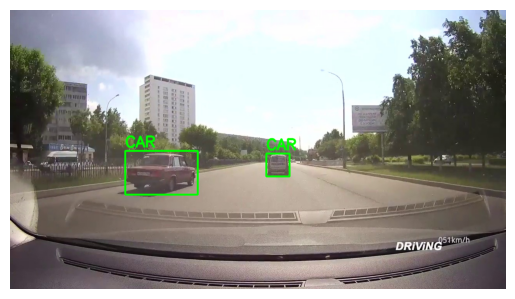

In [6]:

# ---------------------------
# Step 4: Define Inference & Visualization Functions
# ---------------------------
def draw_boxes(image, results):
    """
    Draws bounding boxes on the image for each detection with a confidence > 0.6.
    """
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > 0.6:
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(
                image,
                results.names[int(class_id)].upper(),
                (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.3,
                (0, 255, 0),
                3,
                cv2.LINE_AA
            )

def make_boxes(model, image_path):
    """
    Runs the model on the given image path, draws boxes on detections, and displays the image.
    """
    results = model(image_path)[0]
    image = cv2.imread(image_path)
    draw_boxes(image, results)
    # Convert image from BGR to RGB for matplotlib display.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# ---------------------------
# Step 5: Test the Unified YOLO Model on a Sample Image
# ---------------------------
# Update the path below with a valid sample image path from your validation dataset.
sample_image_path = '/kaggle/input/yolo-dataset/images/Val/Sunny/Day/sunnayday1 (13).jpg'
make_boxes(model, sample_image_path)

In [7]:
# Evaluate the unified YOLO model on the validation dataset
eval_results = model.val(data='/kaggle/working/merged.yaml', verbose=True)

# Access metrics as properties (not as callable methods)
precision = eval_results.box.mp      # Mean precision over all classes (as a numpy float)
recall    = eval_results.box.mr      # Mean recall over all classes
mAP_50    = eval_results.box.map50   # Mean AP at IoU=0.5
mAP_50_95 = eval_results.box.map     # Mean AP averaged over IoU thresholds from 0.5 to 0.95

# Compute F1 score using precision and recall
if precision is not None and recall is not None and (precision + recall) > 0:
    f1_score = 2 * precision * recall / (precision + recall)
else:
    f1_score = None

# Print out the evaluation metrics.
print("Evaluation Metrics:")
print("mAP@0.5:     ", mAP_50)
print("mAP@0.5:0.95:", mAP_50_95)
print("Precision:   ", precision)
print("Recall:      ", recall)
print("F1 Score:    ", f1_score)


Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Day... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 655.94it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


                   all        200       1199      0.545      0.438      0.512      0.247
                   car        159        743      0.778      0.791      0.833      0.415
                  bike         99        125      0.718      0.712      0.775      0.451
                  auto         47         60      0.701        0.4      0.491      0.207
                 cycle         29         46      0.294      0.087      0.156     0.0631
                   bus         48         52        0.6      0.692      0.672      0.323
             minitruck         54         58      0.554       0.31      0.335      0.152
                 truck         32         47      0.644      0.462      0.491      0.211
                   van         25         28      0.165     0.0714      0.157     0.0839
                  taxi         10         10          1      0.857      0.995      0.466
                  toto         28         30          0          0      0.218     0.0931


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.0ms preprocess, 50.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
Evaluation Metrics:
mAP@0.5:      0.5122425737269056
mAP@0.5:0.95: 0.24656689233384907
Precision:    0.5453493153458873
Recall:       0.4382872820677196
F1 Score:     0.4859918181753782


In [ ]:
!zip -r /kaggle/working/working.zip /kaggle/working/

**YOLOV11n**

In [3]:
# Install ultralytics if not already installed
!pip install ultralytics

import os
import shutil
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Clear CUDA cache and set seed for reproducibility
torch.cuda.empty_cache()
random_seed = 42
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ---------------------------
# Step 1: Define Paths & YAML
# ---------------------------
# Assume merged.yaml is saved in the current working directory or specify its full path.
yaml_path = '/kaggle/working/merged.yaml'

# ---------------------------
# Step 2: Initialize and Train YOLO Model
# ---------------------------
# Initialize the YOLO model with a pre-trained weight.
model = YOLO("yolo11x.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 17.7 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 109M/109M [00:00<00:00, 268MB/s] 


In [5]:
# Train the model on the unified dataset defined in merged.yaml.
# Adjust hyperparameters as needed.
result = model.train(
    data=yaml_path,      # The merged YAML file with multiple train/val directories.
    epochs=10,           # Set the number of epochs
    imgsz=640,           # Image size
    batch=8,            # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,         # HSV-Hue augmentation
    hsv_s=0.7,           # HSV-Saturation augmentation
    hsv_v=0.4,           # HSV-Value augmentation
    lr0=0.01,            # Initial learning rate
    lrf=0.01,            # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,             # Box loss gain
    cls=0.5,             # Classification loss gain
    dfl=1.5,             # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=False
)

Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/kaggle/working/merged.yaml, epochs=10, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 2533 has 14.74 GiB memory in use. Of the allocated memory 14.37 GiB is allocated by PyTorch, and 177.36 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [4]:

# After training, copy the training output directory to a dedicated folder for clarity.
source_path = "/kaggle/working/runs/detect/train"
destination_path = "/kaggle/working/yolo_unified"
if os.path.exists(destination_path):
    shutil.rmtree(destination_path)
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo_unified'

In [5]:

# ---------------------------
# Step 3: Load the Best Model Weights for Inference
# ---------------------------
# Load the best weights saved during training.
model = YOLO(os.path.join(destination_path, "weights", "best.pt"))



image 1/1 /kaggle/input/yolo-dataset/images/Val/Sunny/Day/sunnayday1 (13).jpg: 384x640 4 cars, 49.2ms
Speed: 1.8ms preprocess, 49.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


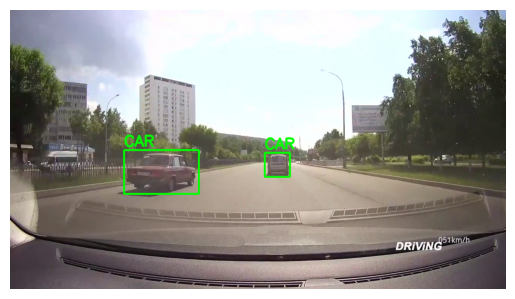

In [6]:

# ---------------------------
# Step 4: Define Inference & Visualization Functions
# ---------------------------
def draw_boxes(image, results):
    """
    Draws bounding boxes on the image for each detection with a confidence > 0.6.
    """
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > 0.6:
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(
                image,
                results.names[int(class_id)].upper(),
                (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.3,
                (0, 255, 0),
                3,
                cv2.LINE_AA
            )

def make_boxes(model, image_path):
    """
    Runs the model on the given image path, draws boxes on detections, and displays the image.
    """
    results = model(image_path)[0]
    image = cv2.imread(image_path)
    draw_boxes(image, results)
    # Convert image from BGR to RGB for matplotlib display.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# ---------------------------
# Step 5: Test the Unified YOLO Model on a Sample Image
# ---------------------------
# Update the path below with a valid sample image path from your validation dataset.
sample_image_path = '/kaggle/input/yolo-dataset/images/Val/Sunny/Day/sunnayday1 (13).jpg'
make_boxes(model, sample_image_path)

In [7]:
# Evaluate the unified YOLO model on the validation dataset
eval_results = model.val(data='/kaggle/working/merged.yaml', verbose=True)

# Access metrics as properties (not as callable methods)
precision = eval_results.box.mp      # Mean precision over all classes (as a numpy float)
recall    = eval_results.box.mr      # Mean recall over all classes
mAP_50    = eval_results.box.map50   # Mean AP at IoU=0.5
mAP_50_95 = eval_results.box.map     # Mean AP averaged over IoU thresholds from 0.5 to 0.95

# Compute F1 score using precision and recall
if precision is not None and recall is not None and (precision + recall) > 0:
    f1_score = 2 * precision * recall / (precision + recall)
else:
    f1_score = None

# Print out the evaluation metrics.
print("Evaluation Metrics:")
print("mAP@0.5:     ", mAP_50)
print("mAP@0.5:0.95:", mAP_50_95)
print("Precision:   ", precision)
print("Recall:      ", recall)
print("F1 Score:    ", f1_score)


Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/yolo-dataset/labels/Val/Rainny/Day... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 642.03it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-dataset/labels/Val/Rainny is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.49it/s]


                   all        200       1199      0.504       0.38      0.446      0.213
                   car        159        743      0.737      0.772      0.806      0.388
                  bike         99        125      0.519      0.776       0.77      0.383
                  auto         47         60      0.719      0.317      0.417      0.205
                 cycle         29         46      0.391      0.152      0.221     0.0852
                   bus         48         52      0.582      0.615      0.641      0.279
             minitruck         54         58       0.37      0.031      0.164     0.0834
                 truck         32         47      0.689       0.34      0.474      0.222
                   van         25         28      0.171      0.179      0.101     0.0565
                  taxi         10         10       0.86      0.616      0.745      0.386
                  toto         28         30          0          0      0.123     0.0464


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.9ms preprocess, 18.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
Evaluation Metrics:
mAP@0.5:      0.4461296224511365
mAP@0.5:0.95: 0.21341722294792975
Precision:    0.5038212460839281
Recall:       0.37983713575113537
F1 Score:     0.4331312257700211


In [8]:
!zip -r /kaggle/working/working.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/val/ (stored 0%)
  adding: kaggle/working/runs/detect/val/F1_curve.png (deflated 5%)
  adding: kaggle/working/runs/detect/val/R_curve.png (deflated 6%)
  adding: kaggle/working/runs/detect/val/confusion_matrix_normalized.png (deflated 17%)
  adding: kaggle/working/runs/detect/val/val_batch1_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/val/val_batch0_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/val/confusion_matrix.png (deflated 22%)
  adding: kaggle/working/runs/detect/val/P_curve.png (deflated 5%)
  adding: kaggle/working/runs/detect/val/PR_curve.png (deflated 8%)
  adding: kaggle/working/runs/detect/val/val_batch2_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/val/val_batch2_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/val/val_batch0_pred.jpg (deflated 9%)
 

**yolov10x**

In [3]:
# Install ultralytics if not already installed
!pip install ultralytics

import os
import shutil
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Clear CUDA cache and set seed for reproducibility
torch.cuda.empty_cache()
random_seed = 42
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ---------------------------
# Step 1: Define Paths & YAML
# ---------------------------
# Assume merged.yaml is saved in the current working directory or spaecify its full path.
yaml_path = '/kaggle/working/merged.yaml'

# ---------------------------
# Step 2: Initialize and Train YOLO Model
# ---------------------------
# Initialize the YOLO model with a pre-trained weight.
model = YOLO('yolov10x.pt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 12.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 61.4M/61.4M [00:00<00:00, 217MB/s]


In [ ]:
# Train the model on the unified dataset defined in merged.yaml.
# Adjust hyperparameters as needed.
result = model.train(
    data=yaml_path,      # The merged YAML file with multiple train/val directories.
    epochs=10,           # Set the number of epochs
    imgsz=640,           # Image size
    batch=8,            # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,         # HSV-Hue augmentation
    hsv_s=0.7,           # HSV-Saturation augmentation
    hsv_v=0.4,           # HSV-Value augmentation
    lr0=0.01,            # Initial learning rate
    lrf=0.01,            # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,             # Box loss gain
    cls=0.5,             # Classification loss gain
    dfl=1.5,             # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=False
)

In [ ]:

# After training, copy the training output directory to a dedicated folder for clarity.
source_path = "/kaggle/working/runs/detect/train"
destination_path = "/kaggle/working/yolo_unified"
if os.path.exists(destination_path):
    shutil.rmtree(destination_path)
shutil.copytree(source_path, destination_path)

In [ ]:

# ---------------------------
# Step 3: Load the Best Model Weights for Inference
# ---------------------------
# Load the best weights saved during training.
model = YOLO(os.path.join(destination_path, "weights", "best.pt"))


In [ ]:

# ---------------------------
# Step 4: Define Inference & Visualization Functions
# ---------------------------
def draw_boxes(image, results):
    """
    Draws bounding boxes on the image for each detection with a confidence > 0.6.
    """
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > 0.6:
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(
                image,
                results.names[int(class_id)].upper(),
                (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.3,
                (0, 255, 0),
                3,
                cv2.LINE_AA
            )

def make_boxes(model, image_path):
    """
    Runs the model on the given image path, draws boxes on detections, and displays the image.
    """
    results = model(image_path)[0]
    image = cv2.imread(image_path)
    draw_boxes(image, results)
    # Convert image from BGR to RGB for matplotlib display.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# ---------------------------
# Step 5: Test the Unified YOLO Model on a Sample Image
# ---------------------------
# Update the path below with a valid sample image path from your validation dataset.
sample_image_path = '/kaggle/input/yolo-dataset/images/Val/Sunny/Day/sunnayday1 (13).jpg'
make_boxes(model, sample_image_path)

In [ ]:
# Evaluate the unified YOLO model on the validation dataset
eval_results = model.val(data='/kaggle/working/merged.yaml', verbose=True)

# Access metrics as properties (not as callable methods)
precision = eval_results.box.mp      # Mean precision over all classes (as a numpy float)
recall    = eval_results.box.mr      # Mean recall over all classes
mAP_50    = eval_results.box.map50   # Mean AP at IoU=0.5
mAP_50_95 = eval_results.box.map     # Mean AP averaged over IoU thresholds from 0.5 to 0.95

# Compute F1 score using precision and recall
if precision is not None and recall is not None and (precision + recall) > 0:
    f1_score = 2 * precision * recall / (precision + recall)
else:
    f1_score = None

# Print out the evaluation metrics.
print("Evaluation Metrics:")
print("mAP@0.5:     ", mAP_50)
print("mAP@0.5:0.95:", mAP_50_95)
print("Precision:   ", precision)
print("Recall:      ", recall)
print("F1 Score:    ", f1_score)

In [ ]:
!zip -r /kaggle/working/working.zip /kaggle/working/